import libray 


In [1]:
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
#!pip install mealy
from nltk.corpus import names
import random
import nltk 
from urllib import request
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
import string
import pandas as pd
import os
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
import nltk.classify.util  # for accuracy & log_likelihood
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
#import mealy
#from mealy.error_analyzer import ErrorAnalyzer
#from mealy.error_visualizer import ErrorVisualizer
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing 

import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


book's url 

In [3]:
url = ["https://www.gutenberg.org/files/19719/19719-0.txt" , "https://www.gutenberg.org/files/14006/14006-0.txt" , "https://www.gutenberg.org/cache/epub/11615/pg11615.txt" , "https://www.gutenberg.org/cache/epub/12629/pg12629.txt","https://www.gutenberg.org/files/15097/15097-0.txt"]

In [4]:

author_name = ["Sherwin Cody" ," William Malone Baskervill and James Witt Sewell" , "Goold Brown" , "Edward Sapir "," Samuel Johnson"]

dic for book and author

In [5]:
res = dict(zip(url , author_name))
res

{'https://www.gutenberg.org/cache/epub/11615/pg11615.txt': 'Goold Brown',
 'https://www.gutenberg.org/cache/epub/12629/pg12629.txt': 'Edward Sapir ',
 'https://www.gutenberg.org/files/14006/14006-0.txt': ' William Malone Baskervill and James Witt Sewell',
 'https://www.gutenberg.org/files/15097/15097-0.txt': ' Samuel Johnson',
 'https://www.gutenberg.org/files/19719/19719-0.txt': 'Sherwin Cody'}

Preprocess the data



In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
all_books =[]
list_of_random_items=[]
per_line = 100 #100 word
all_list = []
list_label = [ ] 
for book,label_file in zip(url,string.ascii_letters):
    response = request.urlopen(book)
    my_book = response.read().decode('utf8').lower()
    tokenizer = RegexpTokenizer('[a-z]{2,}') #remove specail char
    my_book = tokenizer.tokenize(my_book) 
    my_book = [lemmatizer.lemmatize(word) for word in my_book if word not in stop_words] 
    #partition 
    for i in range(len(my_book)):
        part1 = " ".join(my_book[i:i + per_line]) 
        all_list.append(part1)
    #assign file_label author_name
    tmp_list=random.sample(all_list, k=200)
    list_of_random_items.extend(tmp_list)
    list_label.extend([label_file]*len(tmp_list))
    #clear lists
    my_book=[]
    all_list = []

df=pd.DataFrame((zip(list_of_random_items ,  list_label)),columns =['partition', 'label'])
df

,partition,label
0,practically time doubtful macaulay would succe...,a
1,vowel long two syllable following contain shor...,a
2,must blended fine skill fact make fiction much...,a
3,lamb illustration humor may save utterly absur...,a
4,always difficult two thing time reason referen...,a
...,...,...
995,give slay know many word two participle writte...,e
996,work format readable widest variety computer i...,e
997,upon praise way sense hath come short drayton ...,e
998,modification addition deletion project gutenbe...,e


plot unigram & bigram for word frequncy

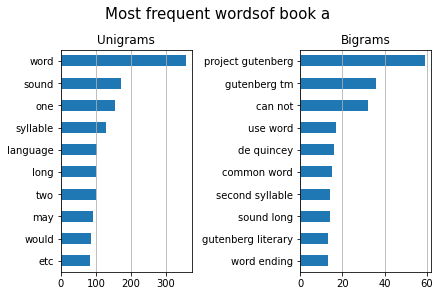

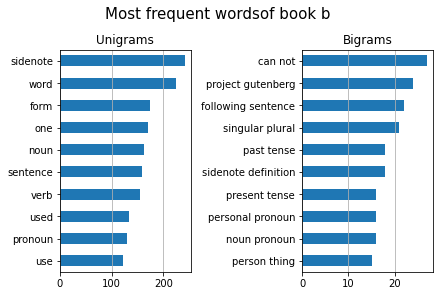

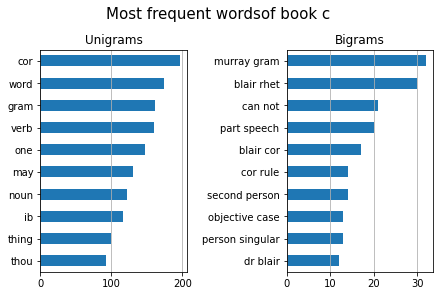

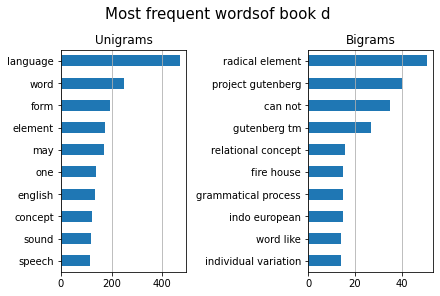

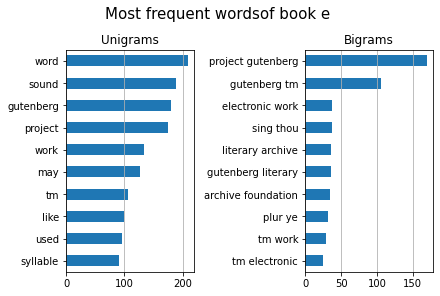

In [11]:
top= 10
for label in df['label'].unique():
    corpus = df[df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
    fig.suptitle(f"Most frequent wordsof book {label} ", fontsize=15)

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)



word cloud for each book


 WordCloud of book a



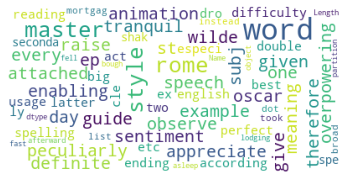


 WordCloud of book b



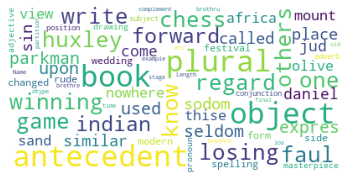


 WordCloud of book c



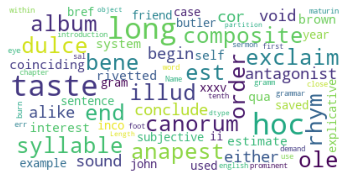


 WordCloud of book d



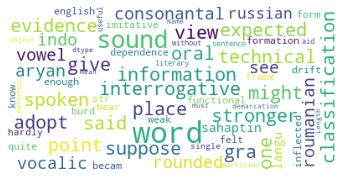


 WordCloud of book e



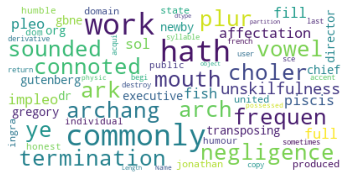

In [9]:
for label in df['label'].unique():
    corpus = df[df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    #wordcloud 
    print(f"\n WordCloud of book {label}\n")
    wc = wordcloud.WordCloud(background_color='white', max_words=100, 
                          max_font_size=35)
    wc = wc.generate(str(corpus))
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show()

function to build model 


In [13]:
def build_model(model , X_train , y_train , X_test , y_test , cv):
    #model before cross_val 
    genral_model = model.fit(X_train,y_train)
    y_pred = genral_model.predict(X_test)
    
    #cross validation
    accuracy =  cross_val_score (estimator=model ,X= X_train,y= y_train ,cv=  cv )
    avg_accuracy = np.mean(accuracy)
    predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    
    
    #plot model_confusion_matrix classification_report
    print(classification_report(y_test, predictions))
    model_confusion_matrix = confusion_matrix(y_test, predictions)
    print(model_confusion_matrix)
    plot_confusion_matrix(model, X_test, y_test)
    print('avg_accuracy: ' , avg_accuracy)
    print('test_accuracy : ' , test_accuracy)
    
    return y_pred, genral_model


    


function to get error index with error label and partition

In [14]:
def error_index(y_pred, y_test, df):

    label_test =y_test.tolist()
    error_index=[] 
    true_lbls = []
    for i in range(len(label_test)):
        if label_test[i] != y_pred[i]:
            error_index.append(i)
            true_lbls.append(label_test[i])

    #compare and retern worng predicted partions 
    error_partions=[] 
    for part in error_index:
        text_error = df.iloc[part,0]
        error_partions.append(text_error)
        
            
    df2=pd.DataFrame((zip(error_partions, df['label'][error_index],error_index, true_lbls)),columns =['error_partition', 'error_label','error_index','True labels'])
    return df2

        

estimate bias and variance

In [15]:
# estimate bias and variance
def bias_variance_est(model,X_train,y_train,X_test,y_test):
    yy_train=np.copy(y_train)
    yy_test=np.copy(y_test)
    lab_encod = preprocessing.LabelEncoder()
    mse, bias, var = bias_variance_decomp(model, X_train,lab_encod.fit_transform( yy_train), X_test,lab_encod.fit_transform(yy_test), num_rounds=2, random_seed=1)
    # summarize results
    print('MSE: %.3f' % mse)
    print('Bias: %.3f' % bias)
    print('Variance: %.3f' % var)
    return mse , bias , var 
    

# Bag of word transform 

In [16]:
countvec = CountVectorizer()
cdf = countvec.fit_transform(df['partition'])
bow = pd.DataFrame(cdf.toarray(), columns = countvec.get_feature_names())
bow

,aad,aan,aaron,ab,abaft,abandoned,abasement,abate,abated,abatement,abb,abbey,abbot,abbott,abbreviate,abbreviated,abbreviation,abenaquies,abeyance,abhors,abia,abib,abid,abide,abided,ability,abl,ablative,able,aboard,abode,abolish,abolished,abolition,abominably,abomination,aboriginal,aborigine,abound,abounded,...,yokuts,yola,yon,yonder,york,yorker,yorkers,young,youngest,youngster,youth,youthful,ypr,ypsilanti,yrent,yrtl,yse,yt,yu,yudo,yukon,yurok,yuste,za,zacarye,zacharias,zaconic,zamboes,zealous,zed,zeit,zeitlin,zenobia,zephyr,zero,zh,zif,zip,zodiac,zophorus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Split dataset into training set and test set after BOW 


In [18]:
X = cdf.toarray()
y = df.label
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



decision tree from BOW 


              precision    recall  f1-score   support

           a       0.63      0.52      0.57        62
           b       0.74      0.78      0.76        55
           c       0.78      0.79      0.78        66
           d       0.79      0.82      0.81        56
           e       0.70      0.75      0.72        61

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

[[32  7 10  4  9]
 [ 6 43  1  2  3]
 [ 7  2 52  1  4]
 [ 3  1  2 46  4]
 [ 3  5  2  5 46]]
avg_accuracy:  0.76
test_accuracy :  0.73


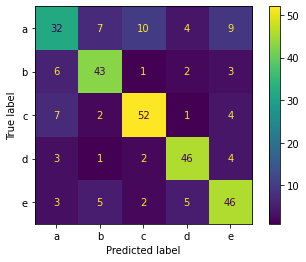

In [19]:
# Train Decision Tree Classifer
bow_DecisionTree_model = DecisionTreeClassifier()
y_pred_dt_bow, DT_model_bow = build_model(bow_DecisionTree_model , X_train , y_train , X_test , y_test , 10)

error labels and partition after modeling  

In [20]:
df_DT_error_partition = error_index(y_pred_dt_bow, y_test, df)
df_DT_error_partition

,error_partition,error_label,error_index,True labels
0,face dead bullet heart ever began description ...,a,5,e
1,majesty state right kingdom called state depen...,a,7,e
2,made famous one sentence usually somehow expre...,a,9,a
3,please remark richly dressed figure wicked nob...,a,17,a
4,unmarked first place well remember large th fi...,a,22,c
...,...,...,...,...
76,sentence ellipsis source error pronoun complex...,b,288,c
77,go coleridge spoken english hand england ameri...,b,294,e
78,superlative take place positive better best ol...,b,296,c
79,id shown inflected gender number case refers e...,b,297,a


###Estimate bias, variance and MSE to Decision Tree Classifer after the Bag of word transform 

In [21]:
#bias_variance_est(DT_model_bow , X_train , y_train , X_test , y_test, y_pred_dt_bow)
#bais and variance DT
DT_BOW_mse, DT_BOW_bias , DT_BOW_var = bias_variance_est(DT_model_bow , X_train , y_train , X_test , y_test)

models_bias = [ ]
models_var = [ ]

MSE: 0.290
Bias: 0.293
Variance: 0.147


In [22]:
models_bias.append(DT_BOW_bias)
models_var.append(DT_BOW_var)

#Support vector machine classifer after the Bag of word transform


              precision    recall  f1-score   support

           a       0.85      0.90      0.88        62
           b       0.85      0.93      0.89        55
           c       0.98      0.91      0.94        66
           d       0.90      0.95      0.92        56
           e       0.96      0.85      0.90        61

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

[[56  2  0  2  2]
 [ 4 51  0  0  0]
 [ 3  3 60  0  0]
 [ 0  3  0 53  0]
 [ 3  1  1  4 52]]
avg_accuracy:  0.8800000000000001
test_accuracy :  0.9066666666666666


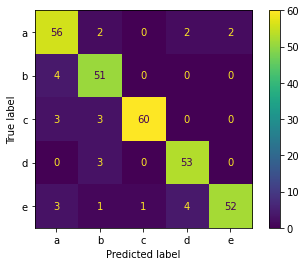

In [23]:
# Train support vector  Classifer
bow_svm_model = svm.SVC(kernel = "linear")
y_pred_svm_bow, SVM_model_bow = build_model(bow_svm_model, X_train , y_train , X_test , y_test , 10)

Data frame of Miss classified partitions after SVM model


In [72]:
#Data frame of Miss classified partitions after SVM model
df_svm_error_partition = error_index(y_pred_svm_bow, y_test, df)
df_svm_error_partition

,error_partition,error_label,error_index,True labels
0,realizes tedious asks say say without tedious ...,a,7,e
1,valley plural made way write sentence followin...,a,14,e
2,word may divided end line student also note co...,a,17,a
3,also long syllable precede vowel accented syll...,a,55,c
4,humor good natured winning always true though ...,a,60,b
5,effected latin word introduced english study p...,a,62,b
6,vowel thus grammat ical etc short vowel accent...,a,70,d
7,grewsome harken hearken hindrance hinderance h...,a,73,e
8,trace twice trice thrice nice price slice lous...,a,75,a
9,yet dance amusing natural manner little boy da...,a,87,e


In [73]:
#Estimate bias, variance and MSE to SVM model Classifer after the Bag of word transform 
SVM_BOW_mse , SVM_BOW_bias , SVM_BOW_var = bias_variance_est(SVM_model_bow , X_train , y_train , X_test , y_test)

MSE: 0.148
Bias: 0.170
Variance: 0.060


In [74]:
models_bias.append(SVM_BOW_bias)
models_var.append(SVM_BOW_var)

K Neighbors Classifier from BOW 

              precision    recall  f1-score   support

           a       0.82      0.65      0.72        62
           b       0.48      0.89      0.62        55
           c       0.97      0.47      0.63        66
           d       0.90      0.82      0.86        56
           e       0.76      0.82      0.79        61

    accuracy                           0.72       300
   macro avg       0.79      0.73      0.72       300
weighted avg       0.79      0.72      0.72       300

[[40 16  1  1  4]
 [ 2 49  0  1  3]
 [ 7 23 31  0  5]
 [ 0  6  0 46  4]
 [ 0  8  0  3 50]]
avg_accuracy:  0.7185714285714286
test_accuracy :  0.72


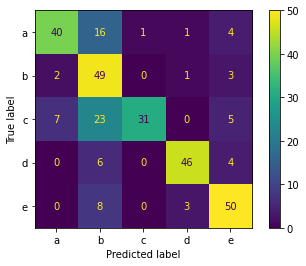

In [75]:
# Train KNeighbors  Classifer
bow_KNeighbors_model = KNeighborsClassifier(n_neighbors=5)
y_pred_KNeighbors_bow, KNeighbors_model_bow = build_model(bow_KNeighbors_model, X_train , y_train , X_test , y_test , 10)

Data frame of Miss classified partitions after KNeighbors model


In [76]:
#Data frame of Miss classified partitions after KNeighbors model
df_KNeighbors_error_partition = error_index(y_pred_KNeighbors_bow, y_test, df)
df_KNeighbors_error_partition

,error_partition,error_label,error_index,True labels
0,hint sentiment sentence laid day without looki...,a,1,e
1,realizes tedious asks say say without tedious ...,a,7,e
2,sill strong supporting beam blow emphasis part...,a,10,c
3,ear absolutely necessary reading poetry well c...,a,11,a
4,valley plural made way write sentence followin...,a,14,e
...,...,...,...,...
79,embrace metal contained may say cook made iron...,b,283,b
80,seventy thousand age ate meat raw lamb first t...,b,284,c
81,concession unless except though although even ...,b,288,c
82,gutenberg removed course hope support project ...,b,290,d


###Estimate bias, variance and MSE to SVM model Classifer after the Bag of word transform 

In [77]:
#Estimate bias, variance and MSE to KNeighbors model Classifer after the Bag of word transform 
KNeighbors_BOW_mse , KNeighbors_BOW_bias , KNeighbors_BOW_var = bias_variance_est(KNeighbors_model_bow , X_train , y_train , X_test , y_test)


MSE: 0.305
Bias: 0.310
Variance: 0.153


In [78]:
models_bias.append(KNeighbors_BOW_bias)
models_var.append(KNeighbors_BOW_var)

# n-gram transform 


In [79]:
nw_DF=df
countervec = CountVectorizer()
out= countervec.fit_transform(nw_DF['partition'])
nw_DF = pd.DataFrame(out.toarray(), columns = countervec.get_feature_names() )
nw_DF

,aad,aaron,ab,abandon,abandoned,abasement,abate,abb,abbess,abbot,abbreviated,abbreviation,abdo,abece,abel,abhorrent,abide,ability,abl,able,ablest,abnormal,aboard,abode,abolished,abomination,abomino,aboriginal,abound,abounded,abraham,abridged,abridgement,abridgment,abroad,absence,absent,absolute,absolutely,absolutives,...,yes,yesterday,yet,yew,yi,yield,yielded,yielding,yit,yiyi,ylad,ynou,yoke,yokel,yon,yonder,york,young,younger,youngest,youngster,youth,youthful,ypsilanti,ypsilon,yse,yudo,zaconic,zaffre,zd,zeal,zed,zeitlin,zephyr,zero,zeta,zeugma,zh,zip,zo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
X_ngram = out.toarray()
y_ngram = df.label
# Split dataset into training set and test set
X_ngram_train, X_ngram_test, y_ngram_train, y_ngram_test = train_test_split(X_ngram, y_ngram, test_size=0.3, random_state=1)

decision tree from N-gram

              precision    recall  f1-score   support

           a       0.68      0.71      0.69        62
           b       0.72      0.78      0.75        55
           c       0.73      0.62      0.67        66
           d       0.75      0.80      0.78        56
           e       0.71      0.69      0.70        61

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

[[44  4  6  3  5]
 [ 4 43  3  2  3]
 [ 9  6 41  5  5]
 [ 3  1  3 45  4]
 [ 5  6  3  5 42]]
avg_accuracy:  0.6914285714285715
test_accuracy :  0.7166666666666667


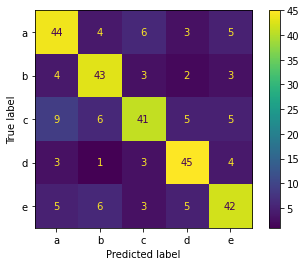

In [81]:
# Train Decision Tree Classifer
ngram_DecisionTree_model = DecisionTreeClassifier()
y_pred_DecisionTree_ngram, DecisionTree_model_ngram = build_model(ngram_DecisionTree_model, X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test , 10)

In [82]:
#Data frame of Miss classified partitions
df_DT_error_partition_ngram = error_index(y_pred_DecisionTree_ngram, y_ngram_test, df)
df_DT_error_partition_ngram

,error_partition,error_label,error_index,True labels
0,technical sens know interpret beyond must make...,a,5,e
1,realizes tedious asks say say without tedious ...,a,7,e
2,valley plural made way write sentence followin...,a,14,e
3,word may divided end line student also note co...,a,17,a
4,worshipped dictionary century make envelop ver...,a,22,c
...,...,...,...,...
80,noticed grew still obvious sight oftener looke...,b,289,e
81,gutenberg removed course hope support project ...,b,290,d
82,direct indirect question pronoun selective amo...,b,291,a
83,two object set object one object class object ...,b,294,e


In [83]:
#Estimate bias, variance and MSE
DT_Ngram_mse , DT_Ngram_bias , DT_Ngram_var = bias_variance_est(DecisionTree_model_ngram , X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test)

MSE: 0.328
Bias: 0.337
Variance: 0.193


In [84]:
models_bias.append(DT_Ngram_bias)
models_var.append(DT_Ngram_var)

support vector machine from N-gram

              precision    recall  f1-score   support

           a       0.85      0.84      0.85        62
           b       0.79      0.89      0.84        55
           c       0.94      0.92      0.93        66
           d       0.95      0.93      0.94        56
           e       0.91      0.85      0.88        61

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[52  5  3  0  2]
 [ 2 49  1  1  2]
 [ 4  1 61  0  0]
 [ 1  2  0 52  1]
 [ 2  5  0  2 52]]
avg_accuracy:  0.8928571428571427
test_accuracy :  0.8866666666666667


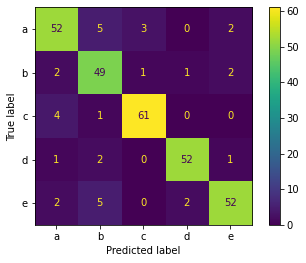

In [85]:
# Train support vector  Classifer
ngram_svm_model = svm.SVC(kernel = "linear")
y_pred_svm_ngram, SVM_model_ngram = build_model(ngram_svm_model, X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test , 10)

In [86]:
#Data frame of Miss classified partitions after SVM model
df_svm_error_partition_ngram = error_index(y_pred_svm_ngram, y_ngram_test, df)
df_svm_error_partition_ngram

,error_partition,error_label,error_index,True labels
0,realizes tedious asks say say without tedious ...,a,7,e
1,valley plural made way write sentence followin...,a,14,e
2,word may divided end line student also note co...,a,17,a
3,also long syllable precede vowel accented syll...,a,55,c
4,humor good natured winning always true though ...,a,60,b
5,effected latin word introduced english study p...,a,62,b
6,vowel thus grammat ical etc short vowel accent...,a,70,d
7,grewsome harken hearken hindrance hinderance h...,a,73,e
8,trace twice trice thrice nice price slice lous...,a,75,a
9,yet dance amusing natural manner little boy da...,a,87,e


In [87]:
#Estimate bias, variance and MSE to SVM model Classifer after the ngram transform 
SVM_Ngram_mse , SVM_Ngram_bias , SVM_Ngram_var = bias_variance_est(SVM_model_ngram , X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test)

MSE: 0.148
Bias: 0.170
Variance: 0.060


In [88]:
models_bias.append(SVM_Ngram_bias)
models_var.append(SVM_Ngram_var)

 K-Neighbors from N-gram

              precision    recall  f1-score   support

           a       0.82      0.65      0.72        62
           b       0.48      0.89      0.62        55
           c       0.97      0.47      0.63        66
           d       0.90      0.82      0.86        56
           e       0.76      0.82      0.79        61

    accuracy                           0.72       300
   macro avg       0.79      0.73      0.72       300
weighted avg       0.79      0.72      0.72       300

[[40 16  1  1  4]
 [ 2 49  0  1  3]
 [ 7 23 31  0  5]
 [ 0  6  0 46  4]
 [ 0  8  0  3 50]]
avg_accuracy:  0.7185714285714286
test_accuracy :  0.72


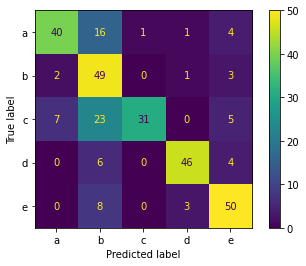

In [89]:
# Train KNeighbors  Classifer
ngram_KNeighbors_model = KNeighborsClassifier(n_neighbors=5)
#build_model(gram_KNeighbors_model , X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test , 10)
y_pred_KNeighbors_ngram, KNeighbors_model_ngram = build_model(ngram_KNeighbors_model, X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test , 10)

In [90]:
#Data frame of Miss classified partitions after KNeighbors model
df_KNeighbors_error_partition_ngram = error_index(y_pred_KNeighbors_ngram, y_ngram_test, df)
df_KNeighbors_error_partition_ngram

,error_partition,error_label,error_index,True labels
0,hint sentiment sentence laid day without looki...,a,1,e
1,realizes tedious asks say say without tedious ...,a,7,e
2,sill strong supporting beam blow emphasis part...,a,10,c
3,ear absolutely necessary reading poetry well c...,a,11,a
4,valley plural made way write sentence followin...,a,14,e
...,...,...,...,...
79,embrace metal contained may say cook made iron...,b,283,b
80,seventy thousand age ate meat raw lamb first t...,b,284,c
81,concession unless except though although even ...,b,288,c
82,gutenberg removed course hope support project ...,b,290,d


In [91]:
#Estimate bias, variance and MSE to KNeighbors model Classifer after transform 
KNeighbors_Ngram_mse , KNeighbors_Ngram_bias , KNeighbors_Ngram_var = bias_variance_est(KNeighbors_model_ngram , X_ngram_train , y_ngram_train , X_ngram_test , y_ngram_test)

MSE: 0.305
Bias: 0.310
Variance: 0.153


In [92]:
models_bias.append(KNeighbors_Ngram_bias)
models_var.append(KNeighbors_Ngram_var)

# Implementation of TF-IDF 

In [14]:
#Importing necessary libraries 
from sklearn.feature_extraction.text import TfidfVectorizer 
# make a copy of all sentences 
all_sentences = df['partition']

# create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to our sentences 
vects=vectorizer.fit_transform(all_sentences)
#vects
# get features names 
features_names = vectorizer.get_feature_names()


# print feartures names for checkig 
#print(f"Feature names \n{features_names}")
matrix = vects.todense()
denselist = matrix.tolist()

#convert list to dataframe

tf_idf_dataframe = pd.DataFrame(denselist, columns=features_names)
print(f"Final Result of TF-IDF \n {tf_idf_dataframe}")

Final Result of TF-IDF 
       aa  aad   ab  abacus  abandoned  ...   zo  zon  zophorus  zou  zour
0    0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
1    0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
2    0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
3    0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
4    0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
..   ...  ...  ...     ...        ...  ...  ...  ...       ...  ...   ...
995  0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
996  0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
997  0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
998  0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0
999  0.0  0.0  0.0     0.0        0.0  ...  0.0  0.0       0.0  0.0   0.0

[1000 rows x 12205 columns]


Split dataset for tf-idf

In [15]:
X_tf = vects.toarray() 
y_tf= df.label
# Split dataset into training set and test set
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.3, random_state=1)

Decision Tree in TF-IDF

              precision    recall  f1-score   support

           a       0.66      0.69      0.68        62
           b       0.76      0.87      0.81        55
           c       0.88      0.67      0.76        66
           d       0.93      0.75      0.83        56
           e       0.68      0.85      0.75        61

    accuracy                           0.76       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.76      0.76       300

[[43  7  2  2  8]
 [ 5 48  1  0  1]
 [10  3 44  1  8]
 [ 2  1  3 42  8]
 [ 5  4  0  0 52]]
avg_accuracy:  0.7428571428571429
test_accuracy :  0.7633333333333333


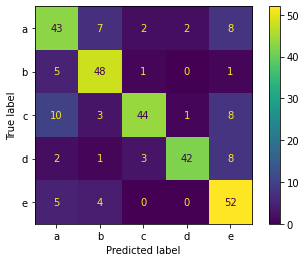

In [16]:
# Train Decision Tree Classifer
tf_DecisionTree_model = DecisionTreeClassifier()
#build_model(TF_DecisionTree_model , X_tf_train , y_tf_train , X_tf_test , y_tf_test , 10)
y_pred_DecisionTree_tf, DecisionTree_model_tf = build_model(tf_DecisionTree_model, X_tf_train , y_tf_train , X_tf_test , y_tf_test , 10)

In [96]:
#Data frame of Miss classified partitions
df_DT_error_partition_tf = error_index(y_pred_DecisionTree_tf, y_tf_test, df)
df_DT_error_partition_tf

,error_partition,error_label,error_index,True labels
0,technical sens know interpret beyond must make...,a,5,e
1,realizes tedious asks say say without tedious ...,a,7,e
2,set idea conflict authority reason one find sp...,a,8,b
3,valley plural made way write sentence followin...,a,14,e
4,sharper evidence life apathy death ever obstin...,a,15,a
...,...,...,...,...
86,time important point nothing important point c...,b,286,e
87,gutenberg removed course hope support project ...,b,290,d
88,verbal noun expressing state condition action ...,b,293,c
89,two object set object one object class object ...,b,294,e


In [97]:
#Estimate bias, variance and MSE
DT_TF_mse , DT_TF_bias , DT_TF_var = bias_variance_est(DecisionTree_model_tf , X_tf_train , y_tf_train , X_tf_test , y_tf_test)

MSE: 0.360
Bias: 0.343
Variance: 0.232


In [98]:
models_bias.append(DT_TF_bias)
models_var.append(DT_TF_var)

support vector in TF-IDF

              precision    recall  f1-score   support

           a       0.87      0.84      0.85        62
           b       0.84      0.85      0.85        55
           c       0.95      0.91      0.93        66
           d       1.00      0.95      0.97        56
           e       0.85      0.95      0.90        61

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[52  5  2  0  3]
 [ 3 47  1  0  4]
 [ 4  2 60  0  0]
 [ 0  0  0 53  3]
 [ 1  2  0  0 58]]
avg_accuracy:  0.9157142857142858
test_accuracy :  0.9


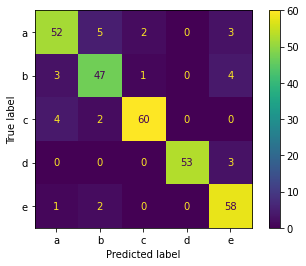

In [99]:
# Train support vector  Classifer
tf_svm_model = svm.SVC(kernel = "linear")
#build_model(TF_svm_model , X_tf_train , y_tf_train , X_tf_test , y_tf_test , 10)
y_pred_svm_tf, SVM_model_tf = build_model(tf_svm_model, X_tf_train , y_tf_train , X_tf_test , y_tf_test , 10)

In [100]:
#Data frame of Miss classified partitions after SVM model
df_svm_error_partition_tf = error_index(y_pred_svm_tf, y_tf_test, df)
df_svm_error_partition_tf

,error_partition,error_label,error_index,True labels
0,realizes tedious asks say say without tedious ...,a,7,e
1,valley plural made way write sentence followin...,a,14,e
2,word may divided end line student also note co...,a,17,a
3,also long syllable precede vowel accented syll...,a,55,c
4,humor good natured winning always true though ...,a,60,b
5,effected latin word introduced english study p...,a,62,b
6,vowel thus grammat ical etc short vowel accent...,a,70,d
7,broad italian far equivalent seventh except ac...,a,72,b
8,act taking skin fruit sound business word soun...,a,97,c
9,intrinsic value writer must study carefully pr...,a,108,b


In [101]:
#Estimate bias, variance and MSE to SVM model Classifer after the tf-idf transform 
SVM_TF_mse , SVM_TF_bias, SVM_TF_var = bias_variance_est(SVM_model_tf , X_tf_train , y_tf_train , X_tf_test , y_tf_test)

MSE: 0.128
Bias: 0.150
Variance: 0.047


In [102]:
models_bias.append(SVM_TF_bias)
models_var.append(SVM_TF_var)

KNeighbors in TF-IDF


              precision    recall  f1-score   support

           a       0.76      0.71      0.73        62
           b       0.66      0.78      0.72        55
           c       0.85      0.67      0.75        66
           d       0.91      0.91      0.91        56
           e       0.75      0.85      0.80        61

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300

[[44  5  5  1  7]
 [ 5 43  3  1  3]
 [ 6 11 44  1  4]
 [ 1  1  0 51  3]
 [ 2  5  0  2 52]]
avg_accuracy:  0.7642857142857142
test_accuracy :  0.78


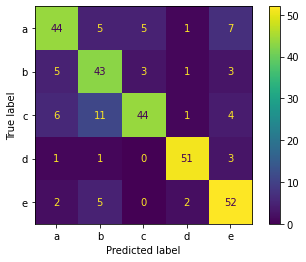

In [103]:
# Train KNeighbors  Classifer
tf_KNeighbors_model = KNeighborsClassifier(n_neighbors=5)
y_pred_KNeighbors_tf, KNeighbors_model_tf = build_model(tf_KNeighbors_model, X_tf_train , y_tf_train , X_tf_test , y_tf_test , 10)

In [104]:
#Data frame of Miss classified partitions after KNeighbors model
df_KNeighbors_error_partition_tf = error_index(y_pred_KNeighbors_tf, y_tf_test, df)
df_KNeighbors_error_partition_tf

,error_partition,error_label,error_index,True labels
0,hint sentiment sentence laid day without looki...,a,1,e
1,idea though every possible point view without ...,a,2,c
2,realizes tedious asks say say without tedious ...,a,7,e
3,valley plural made way write sentence followin...,a,14,e
4,sharper evidence life apathy death ever obstin...,a,15,a
...,...,...,...,...
61,following definition sidenote definition compl...,b,287,a
62,concession unless except though although even ...,b,288,c
63,gutenberg removed course hope support project ...,b,290,d
64,longmans school grammar west english grammar b...,b,296,c


In [105]:
#Estimate bias, variance and MSE to KNeighbors model Classifer after the tf-idf transform 
KNeighbors_TF_mse , KNeighbors_TF_bias , KNeighbors_TF_var = bias_variance_est(KNeighbors_model_tf , X_tf_train , y_tf_train , X_tf_test , y_tf_test)

MSE: 0.262
Bias: 0.293
Variance: 0.148


In [106]:
models_bias.append(KNeighbors_TF_bias)
models_var.append(KNeighbors_TF_var)

new df with each model and his bias & var

In [107]:
model_names=['bow DecisionTree model bow', 'SVM model bow', 'KNeighbors model bow', 'DecisionTree model ngram', 'SVM model ngram', 'KNeighbors model ngram', 'DecisionTree model TF-IDF', 'SVM model TF-IDF' , 'KNeighbors model TF-IDF']

In [108]:
model_df = pd.DataFrame(
    {'model name': model_names,
     'model bias': models_bias,
     'model var': models_var
    })
model_df

,model name,model bias,model var
0,bow DecisionTree model bow,0.336667,0.178333
1,SVM model bow,0.170000,0.060000
2,KNeighbors model bow,0.310000,0.153333
3,DecisionTree model ngram,0.336667,0.193333
4,SVM model ngram,0.170000,0.060000
5,KNeighbors model ngram,0.310000,0.153333
6,DecisionTree model TF-IDF,0.343333,0.231667
7,SVM model TF-IDF,0.150000,0.046667
8,KNeighbors model TF-IDF,0.293333,0.148333


champion model

              precision    recall  f1-score   support

           a       0.97      0.52      0.67        62
           b       0.97      0.60      0.74        55
           c       0.46      1.00      0.63        66
           d       0.97      0.68      0.80        56
           e       0.88      0.75      0.81        61

    accuracy                           0.72       300
   macro avg       0.85      0.71      0.73       300
weighted avg       0.84      0.72      0.73       300

[[32  0 28  0  2]
 [ 0 33 22  0  0]
 [ 0  0 66  0  0]
 [ 0  1 13 38  4]
 [ 1  0 13  1 46]]
avg_accuracy:  0.7028571428571428
test_accuracy :  0.7166666666666667


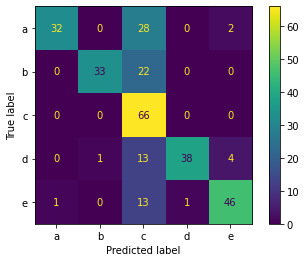

In [63]:
# Train support vector Classifer 
tf_svm_model_champion = svm.SVC(kernel = "poly", max_iter=-1 ,decision_function_shape='ovr') 
y_pred_svm_tf_play, SVM_model_tf_play = build_model(tf_svm_model_play, X_tf_train , y_tf_train , X_tf_test , y_tf_test , 10)

In [68]:
#Estimate bias, variance and MSE to SVM model Classifer after the tf-idf transform 
SVM_TF_mse , SVM_TF_bias, SVM_TF_var = bias_variance_est(tf_svm_model_champion , X_tf_train , y_tf_train , X_tf_test , y_tf_test)

MSE: 0.373
Bias: 0.377
Variance: 0.135


In [ ]:
-------